In [21]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [3]:
acres_df = pd.read_csv('./claire_data/California_Fire_Perimeters.csv')

In [4]:
acres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202 entries, 0 to 12201
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      12202 non-null  int64  
 1   YEAR_         12140 non-null  float64
 2   STATE         12148 non-null  object 
 3   AGENCY        12202 non-null  object 
 4   UNIT_ID       12199 non-null  object 
 5   FIRE_NAME     12174 non-null  object 
 6   INC_NUM       11720 non-null  object 
 7   ALARM_DATE    8214 non-null   object 
 8   CONT_DATE     3375 non-null   object 
 9   CAUSE         12190 non-null  float64
 10  COMMENTS      1886 non-null   object 
 11  REPORT_AC     3836 non-null   float64
 12  GIS_ACRES     12202 non-null  float64
 13  C_METHOD      3759 non-null   float64
 14  OBJECTIVE     12146 non-null  float64
 15  FIRE_NUM      10952 non-null  object 
 16  GlobalID      12202 non-null  object 
 17  SHAPE_Length  12202 non-null  float64
 18  SHAPE_Area    12202 non-nu

In [9]:
acres_df.dropna(subset=['YEAR_'], inplace=True)

In [16]:
acres_df = acres_df[(acres_df['YEAR_'] > 1970) & (acres_df['GIS_ACRES'] > 100)]

In [17]:
acres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6086 entries, 0 to 12201
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      6086 non-null   int64  
 1   YEAR_         6086 non-null   float64
 2   STATE         6032 non-null   object 
 3   AGENCY        6086 non-null   object 
 4   UNIT_ID       6083 non-null   object 
 5   FIRE_NAME     6068 non-null   object 
 6   INC_NUM       5924 non-null   object 
 7   ALARM_DATE    5526 non-null   object 
 8   CONT_DATE     3252 non-null   object 
 9   CAUSE         6074 non-null   float64
 10  COMMENTS      1079 non-null   object 
 11  REPORT_AC     3207 non-null   float64
 12  GIS_ACRES     6086 non-null   float64
 13  C_METHOD      3351 non-null   float64
 14  OBJECTIVE     6057 non-null   float64
 15  FIRE_NUM      4930 non-null   object 
 16  GlobalID      6086 non-null   object 
 17  SHAPE_Length  6086 non-null   float64
 18  SHAPE_Area    6086 non-null

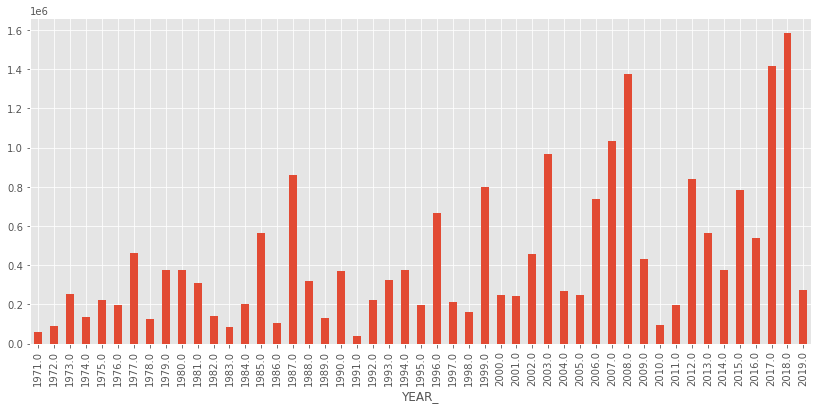

In [23]:
plt.subplots(figsize=(14, 6))
acres_df.groupby('YEAR_')['GIS_ACRES'].sum().plot(kind='bar');